In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.datasets import load_iris

In [2]:
df = load_iris()

In [4]:
df = pd.DataFrame(df.data,columns=df.feature_names)


In [5]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
from sklearn.decomposition import PCA

In [7]:
pca = PCA(n_components=2)

In [8]:
pca_scale = pca.fit_transform(df)

In [9]:
pca_scale

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

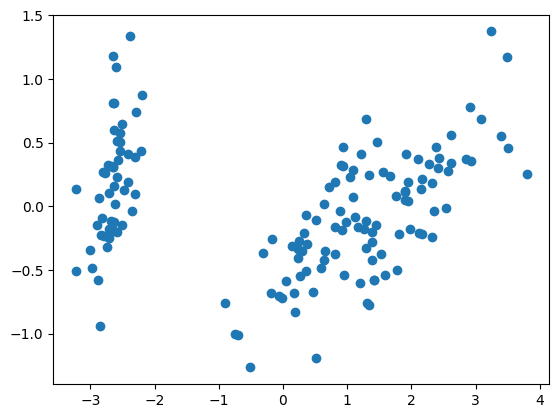

In [10]:
plt.scatter(pca_scale[:,0],pca_scale[:,1])

In [11]:
import scipy.cluster.hierarchy as sa

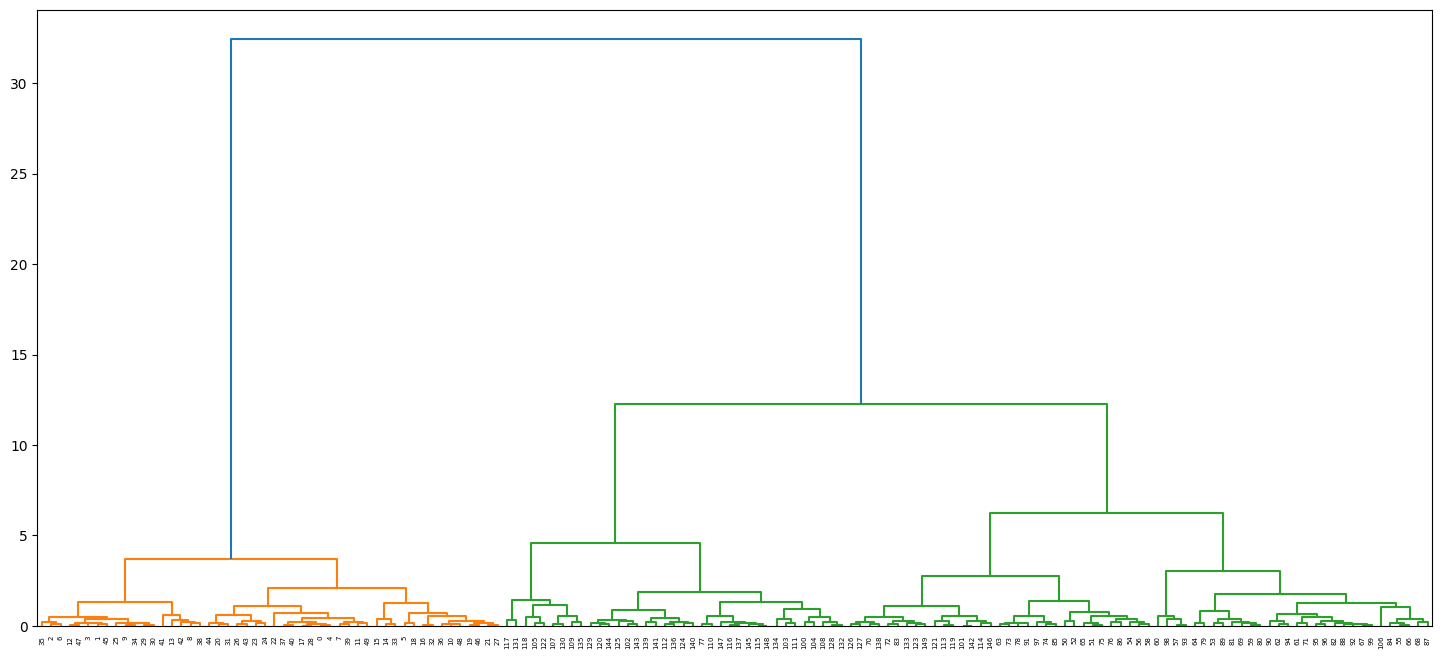

In [12]:
plt.figure(figsize=(18,8))
sa.dendrogram(sa.linkage(pca_scale,method='ward'))
plt.show()

In [13]:
from sklearn.cluster import AgglomerativeClustering

In [15]:
alg = AgglomerativeClustering(n_clusters=2,linkage='ward',affinity='euclidean')

In [16]:
alg.fit(pca_scale)

AgglomerativeClustering(affinity='euclidean')

In [17]:
alg.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

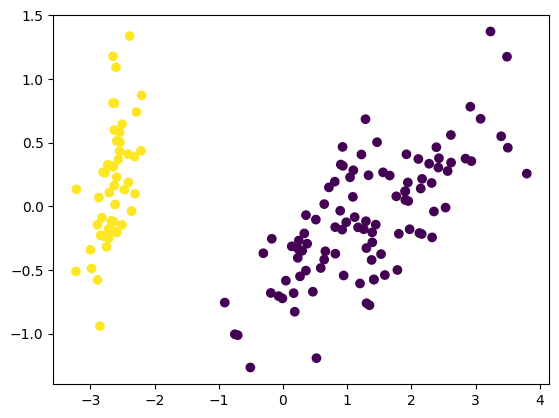

In [18]:
plt.scatter(pca_scale[:,0],pca_scale[:,1],c=alg.labels_)

In [19]:
from sklearn.metrics import silhouette_score
error = []

for k in range(2,20):
    alg = AgglomerativeClustering(n_clusters=k,affinity='euclidean',linkage='ward')
    alg.fit(pca_scale)
    score = silhouette_score(pca_scale,alg.labels_)
    error.append(score)


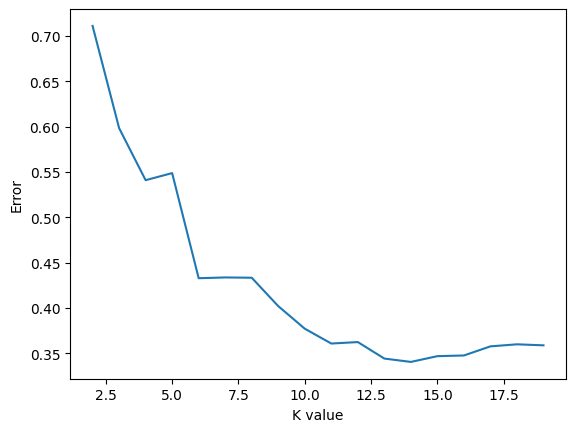

In [20]:
plt.plot(range(2,20),error)
plt.xlabel('K value')
plt.ylabel('Error')
plt.show()

In [37]:
from sklearn.datasets import make_moons

In [39]:
x,y = make_moons(n_samples=250,noise=0.1)

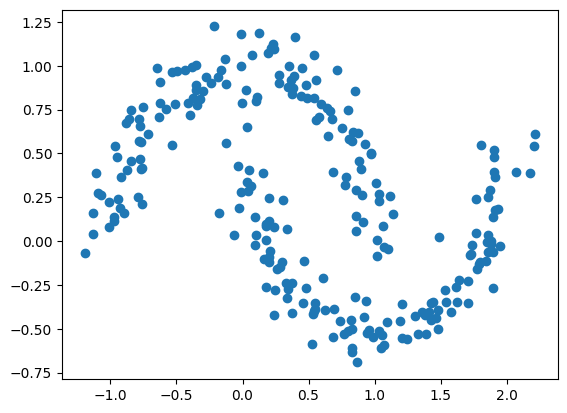

In [40]:
plt.scatter(x[:,0],x[:,1])

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
scaler  = StandardScaler()

In [43]:
x_train = scaler.fit_transform(x)

In [44]:
from sklearn.cluster import DBSCAN

In [45]:
dbscan = DBSCAN(eps=0.5)

In [46]:
dbscan.fit(x_train)

DBSCAN()

In [47]:
dbscan.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

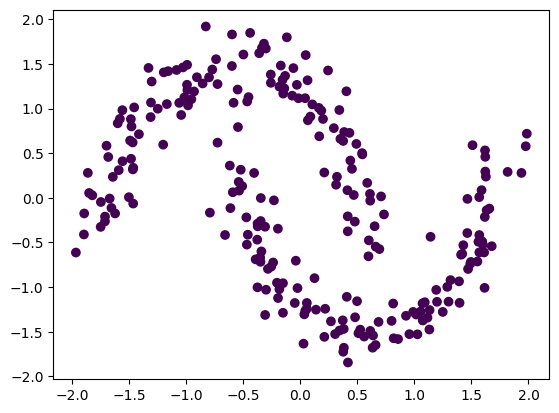

In [48]:
plt.scatter(x_train[:,0],x_train[:,1],c=dbscan.labels_)